# La cocina de los LLM
by Jose Bengoa, 16/11/2025.
Con la ayuda de Anthropic (Claude) y OpenAI (chatGPT)

Este script contiene una implementación básica, a modo de ejemplo, de vectorización semántica aplicada a entidades biológicas (Biodiversity Vectorization, BV). Es una técnica que se propone para aplicar los avances del Natural Language Processing (NLP) al estudio espacial y funcional de la biodiversidad.

Sigue un planteamiento equivalente al embedding que se hace en el procesamiento del lenguaje natural para convertir las bases de datos de biodiversidad en bases de datos de vectores.

Los vectores se obtienen mediante un modelo entrenado con la información que aporta la coocurrencia de especies en unas mismas localidades, celdas, etc.
Esta vectorización facilita el procesado de la biodiversidad, para tareas como:
* Detectar citas anómalas
* Predecir hábitats
* Rellenar huecos en zonas poco muestreadas
* Generar un mapa de similitud entre celdas
* Generar un mapa de similitud para una especie concreta

Para ello se genera un corpus de especies que se descarga de la base de datos de biodiversidad GBIF (www.gbif.org) usando su API (https://techdocs.gbif.org/en/openapi/, https://github.com/gbif/gbif-api) usando tanto el paquete pygbif (https://github.com/gbif/pygbif), como las llamadas a la API mediante HTTP.


## **Descripción del script**

Este script, desarrollado para las *Jornadas sobre Información de Biodiversidad y Administraciones Ambientales 2025*, muestra paso a paso cómo transformar datos de biodiversidad procedentes de GBIF en representaciones vectoriales que permiten aplicar técnicas modernas de análisis semántico y modelos de aprendizaje automático.

El objetivo principal es ilustrar cómo pasar de datos de ocurrencias —registros puntuales de especies— a **embeddings**: vectores numéricos que capturan relaciones ecológicas, coocurrencias y similitudes entre especies y entre celdas espaciales.


### **Qué hace el script**

1. **Instala las dependencias necesarias**

   * `pygbif` para descargar datos desde la API de GBIF
   * `gensim` para generar embeddings con Word2Vec
   * `scikit-learn` para calcular similitud y otras tareas
   * `pandas`, `numpy`, `matplotlib`, `requests`, para diversas tareas

2. **Importa las librerías y configura parámetros básicos**
   Se definen el reino biológico, el país, el tamaño de página para las descargas y otros parámetros de control.

3. **Descarga masiva de ocurrencias desde GBIF**
   Utilizando `pygbif` o la API REST:

   * Se obtiene un corpus de especies y coordenadas
   * Se filtra por calidad de datos (coordenadas válidas, sin flags críticos)
   * Se agregan los datos por celdas (rejilla espacial regular)

4. **Construcción del corpus ecológico para entrenar el modelo**
   Cada celda se convierte en una *"frase"* y las especies presentes en *"palabras"*.
   Esto permite aplicar técnicas de Procesamiento del Lenguaje Natural a la biodiversidad.

   Ejemplo:

   ```
   Celda A → ["Quercus ilex", "Pinus halepensis", "Thymus mastichina"]
   Celda B → ["Pinus sylvestris", "Juniperus communis"]
   ```

5. **Entrenamiento del modelo Word2Vec**
   Con `gensim`, se entrena un modelo que aprende:

   * semejanza ecológica entre especies
   * patrones de coocurrencia
   * afinidad ambiental entre celdas
   * gradientes biogeográficos

6. **Generación de embeddings**
   El script calcula:

   * **embedding de especies**: vector que representa el "nicho semántico" basado en coocurrencias
   * **embedding de celdas**: media de los vectores de las especies presentes en cada celda

7. **Normalización y reducción de dimensionalidad (PCA)**
   Para visualizar los resultados, se aplica PCA y se generan gráficos donde:

   * las especies se agrupan según afinidad ecológica
   * las celdas forman clústeres ambientales o biogeográficos

8. **Aplicaciones prácticas**
   El script incluye ejemplos de:

   * **Detección de anomalías**: celdas que no encajan con su entorno
   * **Predicción de hábitats esperables**: similitud celda–especie
   * **Mapas de similitud**: visualización de patrones espaciales complejos
   * **Relleno de huecos**: identificar áreas poco muestreadas con alta afinidad (en realidad, para esto no hace falta vectorizar, pero puede ayudar).

9. **Caso práctico final**
   Una sección específica permite seleccionar una especie concreta y generar:

   * su vector de hábitat (embedding medio de celdas donde aparece)
   * un mapa coloreado según la similitud ecológica con ese vector
     
   Esto sirve para detectar:
   * hábitats favorables no muestreados
   * posibles errores o citas anómalas
   * áreas biogeográficamente interesantes

---

## **Parámetros Configurables**

El script permite ajustar múltiples parámetros según las necesidades del análisis:

### Parámetros de descarga de GBIF
* `KINGDOM`: Reino taxonómico a estudiar (ej. "Animalia", "Plantae")
* `COUNTRY`: Código ISO del país (ej. "ES" para España)
* `PAGE_SIZE`: Número de registros por página (máx. 300)
* `FETCH_RECORDS`: Número total de registros a descargar
* `BOUNDING_BOX`: Coordenadas geográficas del área de estudio

### Parámetros del modelo Word2Vec
* `VECTOR_SIZE`: Dimensión de los vectores (típicamente 50-300)
* `WINDOW`: Tamaño de la ventana de contexto
* `MIN_COUNT`: Frecuencia mínima de aparición de una especie
* `WORKERS`: Número de hilos para procesamiento paralelo
* `EPOCHS`: Número de iteraciones de entrenamiento

### Parámetros espaciales
* `CELL_SIZE`: Tamaño de la celda en grados (determina la resolución espacial)
* `MIN_SPECIES_PER_CELL`: Número mínimo de especies por celda para incluirla en el análisis

---

## **Contexto Técnico y Métrica de Similitud**

El script implementa la comparación entre especies o celdas utilizando una métrica común en el análisis de vectores: la **Similitud del Coseno**.

### 1. Vectores de Celdas (Embeddings)

Cada celda geográfica o hábitat se representa como un vector de alta dimensión (un embedding), donde cada dimensión codifica información semántica sobre la biodiversidad de esa celda. Estos vectores se almacenan en el diccionario `cell_embeddings`.

### 2. Similitud del Coseno

La **Similitud del Coseno** (Cosine Similarity) mide el ángulo entre dos vectores en un espacio multidimensional, independientemente de su magnitud.

* Un valor de **1** indica que los vectores son idénticos en dirección (máxima similitud)
* Un valor de **0** indica que los vectores son ortogonales (sin relación)
* Un valor de **-1** indica que los vectores son opuestos

En el script, la similitud entre un vector de hábitat (`habitat_vec`) y el vector de una celda específica (`vec`) se calcula usando la función `cosine_similarity` de scikit-learn.

La fórmula matemática para la Similitud del Coseno entre dos vectores **A** y **B** es:

```
Similitud(A,B) = (A · B) / (||A|| × ||B||)
```

Donde:
* **A · B** es el producto escalar (dot product)
* **||A||** y **||B||** son las magnitudes (norma euclidiana) de los vectores

#### Interpretación en el contexto ecológico

* **Similitud alta (cercana a 1)**: Las celdas comparten composiciones de especies similares, sugiriendo condiciones ambientales o biogeográficas parecidas
* **Similitud baja (cercana a 0)**: Las celdas tienen comunidades biológicas muy diferentes
* **Similitud negativa**: Raramente ocurre en este contexto, pero indicaría composiciones completamente opuestas

### 3. Manejo de Celdas sin Vectorización

Para las celdas identificadas (`cid`) que no están presentes en la base de datos de vectores (`cell_embeddings`), el script asigna un vector de ceros del tamaño `VECTOR_SIZE`, asegurando que el cálculo de la similitud se pueda realizar con un valor por defecto:

```python
vec = cell_embeddings.get(cid, np.zeros((1, VECTOR_SIZE)))
```

Esto resulta en una similitud baja o neutra para celdas sin datos, evitando errores en el análisis y permitiendo identificar áreas con información insuficiente.

El resultado de estas comparaciones se almacena en una columna llamada `sim_species` dentro del DataFrame `cell_df`, permitiendo mapear la similitud de cada celda respecto al hábitat de referencia mediante visualizaciones espaciales coloreadas.

---

## **Flujo de Trabajo Completo**

```
DATOS BRUTOS DE GBIF
         ↓
LIMPIEZA Y FILTRADO
         ↓
AGREGACIÓN ESPACIAL (celdas)
         ↓
CONSTRUCCIÓN DEL CORPUS
         ↓
ENTRENAMIENTO Word2Vec
         ↓
GENERACIÓN DE EMBEDDINGS
         ↓
CÁLCULO DE SIMILITUDES
         ↓
VISUALIZACIÓN Y ANÁLISIS
```

---

## **Requisitos del Sistema**

* Python 3.7 o superior
* Conexión a internet para descargar datos de GBIF
* Memoria RAM: mínimo 4GB recomendado para conjuntos de datos grandes
* Espacio en disco: variable según el volumen de datos descargados

---

## **Salidas y Resultados**

El script genera:

1. **Archivos CSV** con los datos descargados y procesados
2. **Gráficos de dispersión PCA** mostrando la estructura de los embeddings
3. **Mapas de calor** con similitudes ecológicas
4. **Modelos Word2Vec entrenados** (guardables para uso posterior)
5. **Matrices de similitud** entre especies y celdas

---




## Intalación de dependencias

In [51]:
# Para descarga de gfib
!pip install pygbif

In [52]:
# Para embedding y trabajo con vectores (similitud)
!pip install gensim
# !pip install scikit-learn
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [53]:
# Para generar gráficos
!pip install pandas numpy matplotlib

## Imports

In [54]:
# Imports generales
import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [55]:
# Imports específicos:
from pygbif import occurrences
from gensim.models import Word2Vec
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

## Configuración

In [81]:
# Parámetros
REINO = "Plantae"
COUNTRY = "ES"
COMUNIDAD = "Aragón"   #  Verificar que Aragón aparece en GBIF con tilde
# limit = 2000  # máximo por llamada; ajusta si necesitas más
PAGE_SIZE = 300  #  GBIF limita a 300 registros por página
FETCH_RECORDS = 5000
VECTOR_SIZE = 128  #  64
PROCESAR_CON_WORD2VECT = True
DESCARGAR_TAXON = False
CALCULAR_PCA = False
MODELAR_TAXON_KEY = False
if MODELAR_TAXON_KEY:
    SP_DF_KEY_INI = "taxon_key"
    SP_DF_KEY_FIN = "taxon_key"
    SP_ID_KEY = "taxonKey"
    # SP_DF_KEY_INI = "usage_key"
    # SP_DF_KEY_FIN = "usage_key"
    # SP_ID_KEY = "usageKey"
else:
    SP_DF_KEY_INI = "scientificName"
    SP_DF_KEY_FIN = "species_clean"
    SP_ID_KEY = "speciesKey"

DESCARGAR_CON_PYGBIF = False
USAR_DRIVE = True
if USAR_DRIVE:
    from google.colab import drive
    drive.mount('/content/drive')
    data_filename = '/content/drive/MyDrive/gbif/gbif_plants_aragon_90k.csv'
else:
    DESCARGAR_CON_PYGBIF = True
    data_filename = f"gbif_plants_aragon_{int(FETCH_RECORDS / 1000)}k.csv"

# especie_elegida = "Hepatica nobilis"
# especie_elegida = "Narcissus pseudonarcissus"
# especie_elegida = "Populus alba"
especie_elegida = "Pinus uncinata"

INPUT_NAME = "Hepatica nobilis"   # Permite solo género + especie
BOUNDING_BOX = {
    "min_lat": 40.0,
    "max_lat": 43.0,
    "min_lon": -1.5,
    "max_lon": 0.8
}
OUTPUT_FILE = "gbif_plants_aragon_fixed.csv"

## Funciones auxiliares

### Obtención de taxonKey y usageKey a partir de la especie (género especie [auth.])
 (y viceversa)

In [57]:
# Funciones para obtener el id_key a partir del nombre y viceversa
def species_to_idkey(name, id_key_key=SP_ID_KEY):
    """
    Devuelve el usageKey correspondiente al nombre científico.
    Tolera género + especie sin autor.
    """
    url = "https://api.gbif.org/v1/species/match"
    r = requests.get(url, params={"name": name}).json()

    # if r.get("speciesKey"):
    #     return r["speciesKey"]
    if r.get(id_key_key):
        return r[id_key_key]
    else:
        genero = name.split()[0]
        especie = name.split()[1]
        genero_especie = genero.join(name.split()[1:])
        r = requests.get(url, params={'genus': genero, 'species': especie}).json()
        if r.get(id_key_key):
            return r[id_key_key]

    return None


def species_to_usagekey(name_query, verbose= False):
    genus_name = name_query.split()[0]
    species_name = name_query.split()[1]

    api_url = "https://api.gbif.org/v1/species/match"

    params = {
        "genus": genus_name,
        "species": species_name
    }

    r = requests.get(api_url, params=params).json()

    if "confidence" in r and r.get(SP_ID_KEY):
        if verbose:
            print(f"✔ Especie encontrada: {r['scientificName']} (taxonKey={r['usageKey']}) con confianza: {r['confidence']}%")
            print(f"URL de la consulta: {requests.Request('GET', api_url, params=params).prepare().url}")
            print("Respuesta completa de la API:")
            print(r)
        return r[SP_ID_KEY]
    else:
        print(f"✖ No se ha podido resolver la especie '{name_query}' usando genus y species.")
        return None


def taxonkey_to_name(id_key):
    url = f"https://api.gbif.org/v1/species/{id_key}"
    r = requests.get(url).json()

    return r.get("scientificName", "unknown")

# Descarga de datasets de GBIF

En este ejemplo se descargan datos (ver configuración, más arriba):
 - Taxón: Plantae (kingdom=Plantae)
 - País: España (country=ES)
 - Provincia/Comunidad: Aragón (stateProvince=Aragón)
 - Solo registros con coordenadas


Se guarda CSV con campos básicos.


## Funciones auxiliares para la descarga de GBIF

In [58]:
def fetch_page(offset=0, limit=PAGE_SIZE):
    # occ_search es un wrapper de la API /occurrence/search
    res = occurrences.search(
        kingdom=REINO,
        country=COUNTRY,
        stateProvince=COMUNIDAD,
        has_coordinate=True,
        limit=limit,
        offset=offset
    )
    return res

def fetch_all(out_csv = "gbif_plants_aragon.csv"):
    global DESCARGAR_CON_PYGBIF
    all_records = []
    offset = 0
    # primera petición para conocer total
    rpta_occurrences = fetch_page(offset=0, limit=PAGE_SIZE)
    total = rpta_occurrences.get('count', 0)
    print(f"Total estimado de registros que coinciden: {total}")
    print(f'Rpta de occurences ({type(rpta_occurrences)}), claves: {rpta_occurrences.keys()}')
    docs = rpta_occurrences.get('results', [])
    print(f'5 Results ({type(docs)}: {docs[:5]})')  #  <class 'list'>
    # recoger hasta max_records (o todo si prefieres)
    max_records = min(total, FETCH_RECORDS)  # ajustar máximo a lo que necesites/puedas
    print(f"Se van a descargar {max_records} registros")
    while offset < max_records:
        if offset % 5000 == 0 or offset % (PAGE_SIZE * 10) == 0:
            print(f"Descargando offset {offset} ...")
        rpta_occurrences = fetch_page(offset=offset, limit=PAGE_SIZE)
        docs = rpta_occurrences.get('results', [])
        for d in docs:
            # Extraer los campos más útiles
            all_records.append({
                'kingdom': d.get('kingdom'),
                # 'phylum': d.get('phylum'),
                # 'class': d.get('class'),
                # 'order': d.get('order'),
                'family': d.get('family'),
                'taxon_key': d.get('taxonKey'),  #  identificador de taxon
                'usage_key': d.get('usageKey'),  #  identificador de taxon: esta descarga no incluye usageKey -> nan
                'gbifID': d.get('gbifID'),  #  identificador de cita
                'scientificName': d.get('scientificName'),
                'species': d.get('species'),
                'decimalLatitude': d.get('decimalLatitude'),
                'decimalLongitude': d.get('decimalLongitude'),
                'eventDate': d.get('eventDate'),
                'country': d.get('country'),
                'stateProvince': d.get('stateProvince'),
                'basisOfRecord': d.get('basisOfRecord'),
                'datasetKey': d.get('datasetKey'),
                'recordedBy': d.get('recordedBy'),
                'coordinateUncertaintyInMeters': d.get('coordinateUncertaintyInMeters')
            })
        offset += PAGE_SIZE
        # evitamos peticiones excesivas por si acaso
    df_ini = pd.DataFrame(all_records)
    print(f"Guardado {len(df_ini)} registros en {out_csv}")
    df_ini.to_csv(out_csv, index=False)
    DESCARGAR_CON_PYGBIF = False

In [59]:
if DESCARGAR_CON_PYGBIF:
    fetch_all(out_csv=data_filename)

# Creación del corpus y entrenamiento del modelo.

## Función para cargar el dataset en un dataframe
Incluye limpieza del nombre científico (si se usa como identificador en lugar de taxonkey) y eliminación de registros sin coordenadas

In [60]:
def crear_dataframe_especies(spp_filename="gbif_descarga.csv", verbose_head=False):
    # ------------------------------------------------------------------------------
    # 1. Cargar y limpiar datos
    # ------------------------------------------------------------------------------
    spp_df_ini = pd.read_csv(spp_filename)
    print(f'\n-->>spp_df_ini ({type(spp_df_ini)}): {spp_df_ini.shape}')  #  <class 'pandas.core.frame.DataFrame'>
    if verbose_head:
        print(f'Head del dataframe:')
        print(spp_df_ini.head)
    print(f'Columnas de dataframe: {spp_df_ini.columns}')

    print("Registros totales antes de filtrar por reino:", len(spp_df_ini))
    # Filtrar por reino (Plantae)
    spp_df_ini = spp_df_ini[spp_df_ini['kingdom'] == REINO]
    print(f"Registros después de filtrar por reino '{REINO}':", len(spp_df_ini))

    # Nos quedamos con columnas clave:
    cols = [
        # 'taxon_key',
        # 'usage_Key',
        # 'gbifID',
        # "scientificName",
        SP_DF_KEY_INI,
        "species",
        "decimalLatitude",
        "decimalLongitude",
        "coordinateUncertaintyInMeters"
    ]
    spp_df_coord = spp_df_ini[cols].copy()

    # Filtrar coordenadas válidas
    if verbose_head:
        print(f'Head de spp_df_coord antes de eliminar los nan:\n{spp_df_coord.head}')
    spp_df_coord = spp_df_coord.dropna(subset=[SP_DF_KEY_INI, "decimalLatitude", "decimalLongitude"])
    print("Registros después de elimina los nan:", len(spp_df_coord))

    # Unificar nombre de especie (quitar "L." y autores no esenciales)
    if MODELAR_TAXON_KEY:
        spp_df_coord[SP_DF_KEY_FIN] = spp_df_coord[SP_DF_KEY_INI].astype(int).astype(str)  #  SP_DF_KEY_FIN = "usage_key" o "taxon_key"
        print("Registros con id_key como str:", len(spp_df_coord))
    else:
        spp_df_coord[SP_DF_KEY_FIN] = (  #  "species_clean"
            spp_df_coord[SP_DF_KEY_INI]  #  "scientificName"
            .str.replace(r"\s+\w\.$", "", regex=True)
            .str.replace(r"\s+\(.+\)", "", regex=True)
            .str.strip()
        )
        print("Registros con scientificName limpios:", len(spp_df_coord))

    # Filtrar incertidumbre > 1000 m (opcional)
    if "coordinateUncertaintyInMeters" in spp_df_coord.columns:
        spp_df_coord = spp_df_coord[(spp_df_coord["coordinateUncertaintyInMeters"].isna()) |
                (spp_df_coord["coordinateUncertaintyInMeters"] <= 1000)]

    print("Registros tras limpieza (i/ certidumbre de coordenadas <= 1000):", len(spp_df_coord))
    return spp_df_ini, spp_df_coord

## Función para la crear el corpus de especies agrupadas en celdas

Equivale a las palabras agrupadas en frases del NLP.
Pasaremos este corpus al modelo Word2Vect.

In [61]:
def crear_corpus_especies_celdas(spp_df_local):
    # ------------------------------------------------------------------------------
    # 2. Crear cuadricula 10 x 10 km
    #    Aragón está en torno a lat 40.9–42.6 y lon -1.9 – 0.6 → perfecto
    # ------------------------------------------------------------------------------
    cell_size_km = 1
    km_per_deg_lat = 111  # aproximación
    km_per_deg_lon = 85   # para ~40-42ºN

    spp_df_local["cell_lat"] = (spp_df_local["decimalLatitude"]  // (cell_size_km / km_per_deg_lat)).astype(int)
    spp_df_local["cell_lon"] = (spp_df_local["decimalLongitude"] // (cell_size_km / km_per_deg_lon)).astype(int)

    spp_df_local["cell_id"] = spp_df_local["cell_lat"].astype(str) + "_" + spp_df_local["cell_lon"].astype(str)

    print(f'Se muestran algunos valores de cell_id:')
    print(spp_df_local["cell_id"].head())
    # ------------------------------------------------------------------------------
    # 3. Crear corpus: lista de especies por celda = "frases"
    # ------------------------------------------------------------------------------
    spp_list_corpus = (
        spp_df_local.groupby("cell_id")[SP_DF_KEY_FIN]
        .apply(lambda x: list(set(x)))   # set evita repeticiones de especie en celda
        .tolist()
    )

    mostrar_numero_especies = 10
    print("Número de celdas con datos:", len(spp_list_corpus))
    if spp_list_corpus:
        print("Ejemplo (10 primeras especies de la primera celda):", spp_list_corpus[0][:mostrar_numero_especies])
        num_esp_mostradas = len(spp_list_corpus[0][:mostrar_numero_especies])
        if MODELAR_TAXON_KEY:
            print(f'Convirtiendo esos {num_esp_mostradas} códigos de especie a nombres de especie...')
            lista_esp_in_model = [(taxonkey_to_name(int(k))) for k in spp_list_corpus[0][:mostrar_numero_especies]]
            print(f'\tNombres científicos: {lista_esp_in_model}')
    else:
        print("\nATENCION: No hay celdas con datos.")
    return spp_df_local, spp_list_corpus

## Función para entrenar el modelo Word2Vect

In [62]:
def entrenar_modelo_word2vect(spp_list_corpus):
    # ------------------------------------------------------------------------------
    # 4. Entrenar Word2Vec
    # ------------------------------------------------------------------------------
    print(f'Entrenamiento del modelo Word2Vec')
    spp_model = Word2Vec(
        sentences=spp_list_corpus,
        vector_size=VECTOR_SIZE,  # se puede ajustar (uso 128 o 64)
        window=5,           # radio ecológico de coocurrencia
        min_count=2,        # ignora especies raras
        workers=4,
        sg=1,               # skip-gram (mejor para rareza ecológica)
        epochs=40
    )

    # Guardar modelo
    spp_model.save("embedding_flora_aragon_w2v.model")
    print("Modelo guardado como embedding_flora_aragon_w2v.model")
    return spp_model

## Ejecuto la creación del corpus y entrenamiento del modelo.



In [63]:
if os.path.exists(data_filename) and PROCESAR_CON_WORD2VECT:
    spp_df_ini, spp_df_clean = crear_dataframe_especies(spp_filename=data_filename)
    print(f'-->>spp_df_clean ({type(spp_df_clean)}): {spp_df_clean.shape}')  #  <class 'pandas.core.frame.DataFrame'>
    spp_df_corpus, spp_list_corpus = crear_corpus_especies_celdas(spp_df_clean)
    print(f'-->>spp_list_corpus ({type(spp_list_corpus)}). Muestra de 10 elementos:')  #  <class 'list'>
    for num_celda, mi_celda in enumerate(spp_list_corpus[:10]):
        print(f'\tCelda {num_celda:2d}: {mi_celda}')
    spp_model = entrenar_modelo_word2vect(spp_list_corpus)
else:
    print('ATENCION: antes de procesar hay que descargar el dataset de GBIF')
    spp_list_corpus = None
    spp_model = None


-->>spp_df_ini (<class 'pandas.core.frame.DataFrame'>): (90000, 16)
Columnas de dataframe: Index(['kingdom', 'family', 'taxon_key', 'usage_key', 'gbifID',
       'scientificName', 'species', 'decimalLatitude', 'decimalLongitude',
       'eventDate', 'country', 'stateProvince', 'basisOfRecord', 'datasetKey',
       'recordedBy', 'coordinateUncertaintyInMeters'],
      dtype='object')
Registros totales antes de filtrar por reino: 90000
Registros después de filtrar por reino 'Plantae': 13832
Registros después de elimina los nan: 13832
Registros con scientificName limpios: 13832
Registros tras limpieza (i/ certidumbre de coordenadas <= 1000): 13047
-->>spp_df_clean (<class 'pandas.core.frame.DataFrame'>): (13047, 6)
Se muestran algunos valores de cell_id:
0    4643_-150
1     4632_-85
4     4720_-40
5    4643_-150
8     4665_-90
Name: cell_id, dtype: object
Número de celdas con datos: 2541
Ejemplo (10 primeras especies de la primera celda): ['Primula veris']
-->>spp_list_corpus (<class 'l

### Chequeo de especies en el modelo entrenado

Se muestran las 10 primeras

In [64]:
species_in_model = spp_model.wv.index_to_key
mostrar_numero_especies = 10
print(f"Número total de especies en el modelo: {len(species_in_model)}")
print(f"Primeras {mostrar_numero_especies} especies en el vocabulario del modelo:")
if MODELAR_TAXON_KEY:
    print(f'Convirtiendo {mostrar_numero_especies} códigos de especie a nombres de especie')
    lista_esp_in_model = [(taxonkey_to_name(int(k))) for k in species_in_model[:mostrar_numero_especies]]
    print(species_in_model[:mostrar_numero_especies])
    print(lista_esp_in_model[:mostrar_numero_especies])
else:
    print(species_in_model[:mostrar_numero_especies])


Número total de especies en el modelo: 1166
Primeras 10 especies en el vocabulario del modelo:
['Hepatica nobilis Schreb.', 'Saxifraga longifolia Lapeyr.', 'Buxus sempervirens', 'Helleborus foetidus', 'Genista scorpius DC.', 'Ramonda myconi Rchb.', 'Iris Tourn. ex', 'Salvia rosmarinus Spenn.', 'Primula veris', 'Eryngium bourgatii Gouan']


# Aplicaciones del modelo BV
Bioddiversity Vectorization, BV

## Búsqueda de especies similares

Se muestra un ejemplo con *Hepatica nobilis*


In [82]:
def buscar_especies_similares(spp_model, sp_name="Hepatica nobilis"):
    # ------------------------------------------------------------------------------
    # 5. Ejemplo de consulta de similitud
    # ------------------------------------------------------------------------------
    print("\n=== EJEMPLO DE CONSULTA ===")
    # print(f'spp_model ({type(spp_model)}): {dir(spp_model)}')
    # spp_model (<class 'gensim.models.word2vec.Word2Vec'>): [
    #     'add_lifecycle_event', 'add_null_word', 'alpha', 'batch_words', 'build_vocab',
    #     'build_vocab_from_freq', 'cbow_mean', 'comment', 'compute_loss', 'corpus_count',
    #     'corpus_total_words', 'create_binary_tree', 'cum_table', 'effective_min_count',
    #     'epochs', 'estimate_memory', 'get_latest_training_loss', 'hashfxn', 'hs', 'init_sims',
    #     'init_weights', 'layer1_size', 'lifecycle_events', 'load', 'make_cum_table',
    #     'max_final_vocab', 'max_vocab_size', 'min_alpha', 'min_alpha_yet_reached', 'min_count',
    #     'negative', 'ns_exponent', 'null_word', 'predict_output_word', 'prepare_vocab',
    #     'prepare_weights', 'random', 'raw_vocab', 'reset_from', 'running_training_loss',
    #     'sample', 'save', 'scan_vocab', 'score', 'seed', 'seeded_vector', 'sg', 'shrink_windows',
    #     'sorted_vocab', 'syn1neg', 'total_train_time', 'train', 'train_count', 'update_weights',
    #     'vector_size', 'window', 'workers', 'wv']
    # print(f'spp_model.wv ({type(spp_model.wv)}): {dir(spp_model.wv)}')
    # spp_model.wv (<class 'gensim.models.keyedvectors.KeyedVectors'>): [
    #     'add_lifecycle_event', 'add_vector', 'add_vectors', 'allocate_vecattrs', 'closer_than',
    #     'cosine_similarities', 'distance', 'distances', 'doesnt_match', 'evaluate_word_analogies',
    #     'evaluate_word_pairs', 'expandos', 'fill_norms', 'get_index', 'get_mean_vector', 'get_normed_vectors',
    #     'get_vecattr', 'get_vector', 'has_index_for', 'index2entity', 'index2word', 'index_to_key',
    #     'init_sims', 'intersect_word2vec_format', 'key_to_index', 'load', 'load_word2vec_format',
    #     'log_accuracy', 'log_evaluate_word_pairs', 'mapfile_path', 'most_similar', 'most_similar_cosmul',
    #     'most_similar_to_given', 'n_similarity', 'next_index', 'norms', 'rank', 'rank_by_centrality',
    #     'relative_cosine_similarity', 'resize_vectors', 'save', 'save_word2vec_format', 'set_vecattr',
    #     'similar_by_key', 'similar_by_vector', 'similar_by_word', 'similarity', 'similarity_unseen_docs',
    #     'sort_by_descending_frequency', 'unit_normalize_all', 'vector_size', 'vectors', 'vectors_for_all',
    #     'vectors_lockf', 'vectors_norm', 'vocab', 'wmdistance', 'word_vec', 'words_closer_than']

    sp_key = species_to_idkey(sp_name)
    if sp_key is None:
        print(f"No se ha podido encontrar el taxonKey para {sp_name}")
        if MODELAR_TAXON_KEY:
            return
    print(f'Se buscan especies afines a la especie {sp_name} (taxonKey: {sp_key}; {type(sp_key)})')
    sp_otro_name = taxonkey_to_name(sp_key)
    print(f'Verificando que ese taxonKey ({sp_key}) corresponde a {sp_otro_name}: {sp_otro_name.startswith(sp_name)}')

    if MODELAR_TAXON_KEY:
        id_taxon = sp_key
    else:
        id_taxon = sp_name
        print(f'Se buscan especies afines a la especie {sp_name}')
        if not id_taxon in spp_model.wv:
            id_taxon = sp_otro_name

    if id_taxon in spp_model.wv:
        lista_simil = spp_model.wv.most_similar(id_taxon, topn=10)
        print(f"\nEspecies más similares a {sp_name}:")
        if MODELAR_TAXON_KEY:
            lista_esp_simil = [(taxonkey_to_name(int(k)), score) for k, score in lista_simil]
        else:
            lista_esp_simil = lista_simil
        for especie, score in lista_esp_simil:
            print(f" - {especie}: {score:.3f}")
    else:
        print(f"{sp_name} ni {sp_otro_name} aparecen en el vocabulario (prueba con otra especie).")

In [83]:
if spp_list_corpus[0][0] is not None:
    buscar_especies_similares(spp_model, sp_name=especie_elegida)


=== EJEMPLO DE CONSULTA ===
Se buscan especies afines a la especie Pinus uncinata (taxonKey: 5285332; <class 'int'>)
Verificando que ese taxonKey (5285332) corresponde a Pinus uncinata Ramond ex DC.: True
Se buscan especies afines a la especie Pinus uncinata

Especies más similares a Pinus uncinata:
 - Scilla verna Huds.: 0.930
 - Dianthus benearnensis Loret: 0.929
 - Corydalis solida Clairv.: 0.914
 - Androsace villosa: 0.914
 - Draba aizoides: 0.913
 - Globularia nudicaulis: 0.912
 - Rubus idaeus: 0.910
 - Ulmus glabra Huds.: 0.904
 - Onosma bubanii Stroh: 0.901
 - Prenanthes purpurea: 0.893


## Embedding de especies

Con esto obtengo el vector que representa a la especie *Narcissus pseudonarcissus*

In [67]:
def embedding_especie(spp_model, id_taxon):
    try:
        return spp_model.wv[ str(id_taxon) ]
    except KeyError:
        return None

mi_especie = 'Narcissus pseudonarcissus'
if MODELAR_TAXON_KEY:
    id_taxon = species_to_idkey(mi_especie)
else:
    id_taxon = mi_especie

vec = embedding_especie(spp_model, id_taxon)
print(f'La especies {mi_especie} se representa mediante un vector de {len(vec)} dimensiones: {vec[:10]}, etc.')

La especies Narcissus pseudonarcissus se representa mediante un vector de 128 dimensiones: [ 0.02421344 -0.08842623 -0.2338209   0.10052541  0.25491667  0.31507736
  0.22077191 -0.09245793 -0.04279747  0.31836984], etc.


## Embedding de celdas


In [68]:
cell_vectors = {}

for cell, species_list in spp_df_clean.groupby("cell_id")[SP_DF_KEY_FIN]:
    vecs = []
    for sp in species_list:
        if str(sp) in spp_model.wv:
            vecs.append(spp_model.wv[str(sp)])
    if vecs:
        cell_vectors[cell] = np.mean(vecs, axis=0)
print('Se ha calculado el embedding para todas las celdas del corpus')
print("Nº de celdas con embedding:", len(cell_vectors))
print(f'Por ejemplo, la primera celda tiene embedding de {len(list(cell_vectors.values())[0])} dimensiones: {list(cell_vectors.values())[0][:10]}, etc.')

Se ha calculado el embedding para todas las celdas del corpus
Nº de celdas con embedding: 2474
Por ejemplo, la primera celda tiene embedding de 128 dimensiones: [-0.05342256 -0.17500193 -0.01276469  0.19930454 -0.0816251  -0.01866886
 -0.02029898  0.0160822   0.21224086  0.21836212], etc.


## Detección de citas anómalas


In [69]:
def score_anomalia(row):
    cell = row["cell_id"]
    sp = row[SP_DF_KEY_FIN]

    try:
        vec_sp = spp_model.wv[str(sp)]
    except KeyError:
        return np.nan

    # Especies que comparten la celda
    species_cell = spp_df_clean[spp_df_clean["cell_id"] == cell][SP_DF_KEY_FIN].unique()
    vecs = []
    for s in species_cell:
        if str(s) in spp_model.wv and s != sp:
            vecs.append(spp_model.wv[str(s)])

    if len(vecs) == 0:
        return np.nan

    sims = cosine_similarity([vec_sp], vecs)[0]
    return np.mean(sims)

spp_df_corpus["anomaly_score"] = spp_df_corpus.apply(score_anomalia, axis=1)

anomalias = spp_df_corpus.sort_values("anomaly_score").head(20)
print(f'anomalias ({type(anomalias)}): {anomalias}')

anomalias (<class 'pandas.core.frame.DataFrame'>):                              scientificName                     species  \
8266              Ramonda myconi (L.) Rchb.              Ramonda myconi   
582                  Juniperus oxycedrus L.         Juniperus oxycedrus   
71759                     Plantago media L.              Plantago media   
13882                 Buxus sempervirens L.          Buxus sempervirens   
14846                 Trifolium pratense L.          Trifolium pratense   
3214                 Helleborus foetidus L.         Helleborus foetidus   
3231     Glaucium corniculatum (L.) Rudolph       Glaucium corniculatum   
13306  Arctostaphylos uva-ursi (L.) Spreng.     Arctostaphylos uva-ursi   
10073                        Sedum album L.                 Sedum album   
10661         Aphyllanthes monspeliensis L.  Aphyllanthes monspeliensis   
11651                Lonicera implexa Aiton            Lonicera implexa   
12241                   Clematis vitalba L.      

## Predicción del hábitat de una especie
Para buscar celdas en las que es esperable una especie

In [70]:
def habitat_probable(spp_model, mi_especie, topn=20):
    if MODELAR_TAXON_KEY:
        id_taxon = species_to_idkey(mi_especie)
    else:
        id_taxon = mi_especie

    mi_vec = embedding_especie(spp_model, id_taxon)
    if mi_vec is None:
        return None

    scores = []
    # cell_vectors se calcula dos celdas más arriba (embedding de celdas)
    # Se compara el embedding de la especie con el de celdas
    for cell, un_vec in cell_vectors.items():
        sim = cosine_similarity([mi_vec], [un_vec])[0][0]
        scores.append((cell, sim))

    return sorted(scores, key=lambda x: -x[1])[:topn]

mi_especie = 'Narcissus pseudonarcissus'
if MODELAR_TAXON_KEY:
    id_taxon = species_to_idkey(mi_especie)
else:
    id_taxon = mi_especie

mi_habitat = habitat_probable(spp_model, "2875011", 10)
print(f'Celdas que componen el hábitat probable de {mi_especie} (10 primeras): {mi_habitat}')


Celdas que componen el hábitat probable de Narcissus pseudonarcissus (10 primeras): None


## Rellenar huecos en zonas poco muestreadas
Dada una celda con pocas especies, predecir otras especies esperables

In [71]:
def especies_esperables(spp_df_local, spp_model, cell_id, topn=20):
    species = spp_df_local[spp_df_local["cell_id"] == cell_id][SP_DF_KEY_FIN].unique()
    species = [str(s) for s in species if str(s) in spp_model.wv]

    if not species:
        return []

    simil = spp_model.wv.most_similar(positive=species, topn=topn)
    return [(sp, score) for sp, score in simil]

especies_esperables(spp_df_corpus, spp_model, "4643_-150", 20)

[('Malva parviflora', 0.9078207612037659),
 ('Viola hirta', 0.9069045782089233),
 ('Astragalus nevadensis subsp. muticus Zarre & Podlech', 0.9045895338058472),
 ('Centaurea pinae Pau', 0.8977867960929871),
 ('Lepidium didymum', 0.8953477740287781),
 ('Viola odorata', 0.8948718309402466),
 ('Athyrium filix-femina Roth', 0.8930275440216064),
 ('Vinca difformis Pourr.', 0.8922103047370911),
 ('Hordeum vulgare', 0.8907514810562134),
 ('Phelipanche rosmarina Banfi, Galasso & Soldano', 0.8899235725402832),
 ('Antirrhinum pulverulentum Lázaro Ibiza', 0.8897606134414673),
 ('Centaurium erythraea Rafn', 0.8880773186683655),
 ('Salvia aethiopis', 0.8863614201545715),
 ('Echium asperrimum Lam.', 0.8851005434989929),
 ('Parentucellia latifolia Caruel', 0.8833957314491272),
 ('Odontites longiflorus Webb', 0.8826625943183899),
 ('Xanthium spinosum', 0.8817945122718811),
 ('Anarrhinum bellidifolium Willd.', 0.8817605972290039),
 ('Onopordum acaulon', 0.8799372315406799),
 ('Ophrys exaltata subsp. ara

## Mapa de similitud entre celdas
Partimos de:
* coordenadas de celdas (centroides)

* embeddings de cada celda (vector medio de especies)

* una celda de referencia target_cell

Generamos un mapa donde cada celda se colorea según su similitud coseno con la celda de referencia.

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def plot_similarity_map(cells_df, cell_embeddings, target_cell_id):
    """
    cells_df debe tener:
        cell_id, lon, lat
    cell_embeddings:
        dict {cell_id: vector_embedding}
    """

    # --- 1. Embedding de referencia
    if target_cell_id in cell_embeddings.keys():
        print(f'Celda Si encontrada: {target_cell_id}')
        ref_vec = cell_embeddings[target_cell_id].reshape(1, -1)
    else:
        print(f'Celda no encontrada: {target_cell_id}')
        print(f'Muestra de celdas: {list(cell_embeddings.keys())[:10]}')
        return

    print(f'Muestra de celdas: {list(cell_embeddings.keys())[:10]}')
    # --- 2. Calculamos similitud para cada celda
    sims = []
    for cid in cells_df["cell_id"]:
        if len(sims) % 1000 == 0:
            print(f'{len(sims)} celdas procesadas')
            print(f'cid: {cid}')
        if cid in cell_embeddings.keys():
            vec = cell_embeddings[cid].reshape(1, -1)
            sim = cosine_similarity(ref_vec, vec)[0][0]
        else:
            sim = 0
        sims.append(sim)

    cells_df["similarity"] = sims

    # --- 3. Representación en mapa
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(
        cells_df["cell_lon"],
        cells_df["cell_lat"],
        c=cells_df["similarity"],
        s=60
    )
    plt.colorbar(sc, label="Similitud coseno")
    plt.title(f"Mapa de similitud respecto a la celda {target_cell_id}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.show()

Columnas de dataframe: Index(['scientificName', 'species', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'species_clean', 'cell_lat',
       'cell_lon', 'cell_id', 'anomaly_score'],
      dtype='object')
Calculando celdas similares a la de referencia...
Celda Si encontrada: 4643_-150
Muestra de celdas: ['4431_-75', '4433_-75', '4437_-94', '4444_-77', '4445_-74', '4449_-90', '4450_-88', '4450_-90', '4451_-59', '4451_-87']
0 celdas procesadas
cid: 4643_-150
1000 celdas procesadas
cid: 4625_-78
2000 celdas procesadas
cid: 4742_-25
3000 celdas procesadas
cid: 4723_39
4000 celdas procesadas
cid: 4681_-32
5000 celdas procesadas
cid: 4606_-74
6000 celdas procesadas
cid: 4694_16
7000 celdas procesadas
cid: 4746_-20
8000 celdas procesadas
cid: 4746_-20
9000 celdas procesadas
cid: 4695_-38
10000 celdas procesadas
cid: 4711_5
11000 celdas procesadas
cid: 4731_-3
12000 celdas procesadas
cid: 4621_-80
13000 celdas procesadas
cid: 4697_63


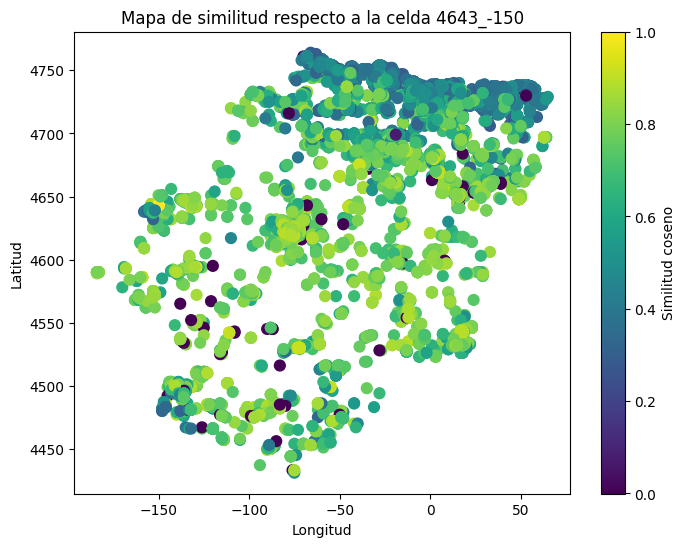

In [73]:
# df con columnas: cell_id, lon, lat
# cells_df = pd.read_csv("cells_metadata.csv")
print(f'Columnas de dataframe: {spp_df_corpus.columns}')
cols = [
    "cell_id",
    # "decimalLatitude",
    # "decimalLongitude",
    "cell_lat",
    "cell_lon",
]
cells_df = spp_df_corpus[cols].copy()

# cells_embeddings: dict{cell_id: np.array}
# cells_embeddings = np.load("cell_embeddings.npy", allow_pickle=True).item()
cells_embeddings = cell_vectors

print('Calculando celdas similares a la de referencia...')
plot_similarity_map(cells_df, cells_embeddings, target_cell_id="4643_-150")

## Mapa de similitud para una especie concreta
Si tienes embeddings de especies vía taxonKey, puedes generar:

* un vector de hábitat (embedding medio de las celdas donde aparece)

* un mapa donde cada celda se colorea según cuánto se parece a ese vector

Útil para:

* predicción de hábitat esperable

* relleno de huecos

* búsqueda de áreas anómalas

In [74]:
def get_species_occ_cells_by_name(spp_df_local, species_name):
    """
    Devuelve la lista de cell_id donde aparece esa especie.
    """
    subset = spp_df_local[spp_df_local[SP_DF_KEY_INI] == species_name]
    if len(subset) == 0:
        print(f'Aviso: no se ha encontrado la especie {species_name} en el campo "{SP_DF_KEY_INI}"')
        print(f'Se prueba con el campo "species"')
        subset = spp_df_local[spp_df_local["species"] == species_name]
        if len(subset) == 0:
            print(f'Atención: tampo se ha encontrado en el campo"species"')
            return []
        else:
            print(f'Se ha encontrado la especie {species_name} en el campo"species"')
    else:
        print(f'Se ha encontrado la especie {species_name} en el campo "{SP_DF_KEY_INI}"')

    return subset["cell_id"].unique().tolist()


def get_species_occ_cells_by_key(df, taxon_key):
    """
    Devuelve la lista de cell_id donde aparece esa especie.
    """
    species_df = df[df["taxonKey"] == taxon_key]

    # Eliminamos duplicados para no contar varias veces la misma celda
    cells = species_df["cell_id"].unique().tolist()

    return cells

In [75]:
def plot_species_similarity(species_key, species_occ_cells, cell_embeddings, cell_df):
    """
    species_key: taxonKey de la especie
    species_occ_cells: lista de cell_id donde aparece
    cell_embeddings: dict {cell_id: vector}
    cell_df: DataFrame con cell_id, lon, lat
    """
    # --- 1. Embedding "hábitat" de la especie
    lista_embeddings = []
    for cid in species_occ_cells:
        if cid in cell_embeddings.keys():
            lista_embeddings.append(cell_embeddings[cid])
        else:
            lista_embeddings.append(VECTOR_SIZE * [0])
    habitat_vec = np.mean(
        # [cell_embeddings[cid] for cid in species_occ_cells],
        lista_embeddings,
        axis=0
    ).reshape(1, -1)

    # --- 2. Similitud con todas las celdas
    sims = []
    for cid in cell_df["cell_id"]:
        if cid in cell_embeddings.keys():
            vec = cell_embeddings[cid].reshape(1, -1)
        else:
            # vec = (VECTOR_SIZE * [0]).reshape(1, -1)
            vec = np.array(VECTOR_SIZE * [0]).reshape(1, -1)  #  vec = np.zeros((1, VECTOR_SIZE))
        sims.append(cosine_similarity(habitat_vec, vec)[0][0])
    cell_df["sim_species"] = sims

    # Elimino los registros con algun campo nan
    print("Registros antes de elimina los nan:", len(cell_df))
    cell_df = cell_df.dropna(subset=["cell_lon", "cell_lat", "sim_species"])
    print("Registros después de elimina los nan:", len(cell_df))

    # --- 3. Representación en mapa
    plt.figure(figsize=(8, 6))
    sc = plt.scatter(
        cell_df["cell_lon"],
        cell_df["cell_lat"],
        c=cell_df["sim_species"],
        s=60
    )
    plt.colorbar(sc, label="Similitud de hábitat")
    plt.title(f"Mapa de hábitat esperable para taxonKey={species_key}")
    plt.xlabel("Longitud")
    plt.ylabel("Latitud")
    plt.show()

Se buscan especies afines a la especie Populus alba (taxonKey: 3040233-> <class 'int'>)
Verificando que ese taxonKey (3040233) corresponde a Populus alba L.: True
Nombre correcto de la especie Populus alba
Aviso: no se ha encontrado la especie Populus alba en el campo "scientificName"
Se prueba con el campo "species"
Se ha encontrado la especie Populus alba en el campo"species"
Lista de celdas en la que esta la especie obtenida ok, con 5 celdas.
species_occ_cells (5 especies): ['4710_6', '4649_-130', '4611_-49', '4642_-132', '4624_-76'], etc.
Registros antes de elimina los nan: 13047
Registros después de elimina los nan: 13047


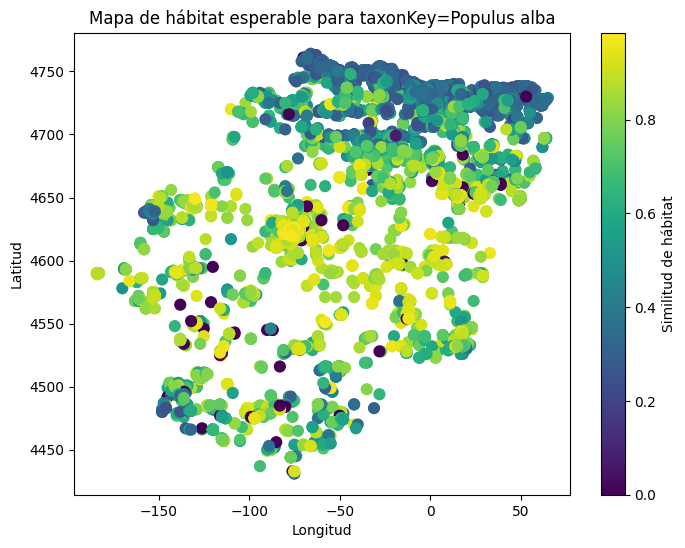

In [76]:
sp_key = species_to_idkey(especie_elegida)
if sp_key is None:
    print(f"\nNo se ha podido encontrar el taxonKey para {especie_elegida}")
else:
    print(f'Se buscan especies afines a la especie {especie_elegida} (taxonKey: {sp_key}-> {type(sp_key)})')  #   <class 'int'
    sp_otro_name = taxonkey_to_name(sp_key)
    print(f'Verificando que ese taxonKey ({sp_key}) corresponde a {sp_otro_name}: {sp_otro_name.startswith(especie_elegida)}')


# CELL_SIZE_DEG = 0.05   # ~5 km

species_key = 2871791  # Ejemplo


if MODELAR_TAXON_KEY:
    id_taxon = sp_key
    species_occ_cells = get_species_occ_cells_by_key(spp_df_corpus, id_taxon)
else:
    id_taxon = especie_elegida
    if not id_taxon in spp_model.wv:
        id_taxon = sp_otro_name
    print(f'Nombre correcto de la especie {id_taxon}')
    species_occ_cells = get_species_occ_cells_by_name(spp_df_corpus, id_taxon)
    print(f'Lista de celdas en la que esta la especie obtenida ok, con {len(species_occ_cells)} celdas.')

if species_occ_cells:
    print(f'species_occ_cells ({len(species_occ_cells)} especies): {species_occ_cells[:10]}, etc.')
    species_key = id_taxon
    cells_embeddings = cell_vectors
    cells_df = cells_df
    plot_species_similarity(species_key, species_occ_cells, cells_embeddings, cells_df)
else:
    print(f'\nATENCION: No se encontraron celdas en las que aparezca la especie {id_taxon}')

# 2. Descarga de citas de especies concretas
## Buscar taxón

In [77]:
# ------------------------------------------
# FUNCIÓN 1:
# Buscar especie con scientificName y, si no existe, con species
# ------------------------------------------
def resolve_species_name(name_query):
    """
    Intenta resolver el nombre usando scientificName primero,
    y si no encuentra match, usa species.
    Devuelve el taxonKey o None.
    """

    # Intento 1: scientificName
    api1 = "https://api.gbif.org/v1/species/match"
    r1 = requests.get(api1, params={"name": name_query}).json()

    if "confidence" in r1 and r1.get(SP_ID_KEY) and r1["confidence"] > 80:
        print(f"✔ scientificName encontrado: {r1['scientificName']} (key={r1['usageKey']})")
        return r1[SP_ID_KEY]

    # Intento 2: species (solo género + especie)
    if len(name_query.split()) >= 2:
        genus, species = name_query.split()[0], name_query.split()[1]
        r2 = requests.get(api1, params={"genus": genus, "species": species}).json()

        if "confidence" in r2 and r2.get(SP_ID_KEY) and r2["confidence"] > 70:
            print(f"✔ species encontrado: {r2['scientificName']} (key={r2['usageKey']})")
            return r2[SP_ID_KEY]

    print("✖ No se ha podido resolver el nombre en GBIF")
    return None

In [78]:
# ------------------------------------------
# FUNCIÓN 2: Descargar citas GBIF
# ------------------------------------------
def download_gbif_occurrences(
        id_key_value,
        bbox,
        page_size=PAGE_SIZE,
        total_size=FETCH_RECORDS
    ):
    url = "https://api.gbif.org/v1/occurrence/search"

    params = {
        SP_ID_KEY: id_key_value,
        "hasCoordinate": "true",
        "limit": page_size,  # GBIF limita a 300 por página
        "offset": 0,
        "decimalLatitude": f"{bbox['min_lat']},{bbox['max_lat']}",
        "decimalLongitude": f"{bbox['min_lon']},{bbox['max_lon']}",
    }

    results = []
    total_downloaded = 0

    while total_downloaded < total_size:
        params["offset"] = total_downloaded
        rpta = requests.get(url, params=params).json()

        if "results" not in rpta or len(rpta["results"]) == 0:
            break

        results.extend(rpta["results"])
        total_downloaded += len(rpta["results"])

        print(f"Descargados {total_downloaded} registros...")

    taxon_df = pd.json_normalize(results)
    print(f"Total descargado: {len(taxon_df)} filas")
    return taxon_df


def descarga_taxon(spp_filename=INPUT_NAME, bounding_box=BOUNDING_BOX):
    # ------------------------------------------
    # PASO 1: Resolver taxón
    # ------------------------------------------
    id_key_value = resolve_species_name(INPUT_NAME)
    if not id_key_value:
        raise ValueError("No se pudo encontrar la especie en GBIF.")

    # ------------------------------------------
    # PASO 2: Descargar datos
    # ------------------------------------------
    taxon_df = download_gbif_occurrences(
        id_key_value,
        bounding_box,
        page_size=PAGE_SIZE,
        total_size=FETCH_RECORDS
    )
    taxon_df.to_csv(OUTPUT_FILE, index=False)
    print(f"✔ Guardado en {OUTPUT_FILE}")
    return taxon_df

In [79]:
def calcula_pca(taxon_df):
    # ==============================================================
    # --------------  BLOQUE DE ANÁLISIS DE EMBEDDING --------------
    # ==============================================================

    print("\n=== INICIO DEL ANÁLISIS DE EMBEDDING ===")

    # Selección de dimensiones clave
    cols = ["decimalLongitude", "decimalLatitude", "eventDate", "basisOfRecord"]

    taxon_df = taxon_df.dropna(subset=["decimalLongitude", "decimalLatitude"])

    # Procesamiento del tiempo
    taxon_df["eventDate"] = pd.to_datetime(taxon_df["eventDate"], errors="coerce")
    taxon_df["year"] = taxon_df["eventDate"].dt.year.fillna(0)

    # Codificar variable categórica
    encoder = LabelEncoder()
    taxon_df["basis_code"] = encoder.fit_transform(taxon_df["basisOfRecord"].astype(str))

    # Matriz numérica para embedding manual
    X = taxon_df[["decimalLongitude", "decimalLatitude", "year", "basis_code"]].fillna(0)

    # PCA a 2D
    mi_pca = PCA(n_components=2)
    coords = mi_pca.fit_transform(X)

    taxon_df["embed_x"], taxon_df["embed_y"] = coords[:, 0], coords[:, 1]

    # -------------------------------
    # Gráfico PCA
    # -------------------------------
    plt.figure(figsize=(8, 6))
    plt.scatter(taxon_df["embed_x"], taxon_df["embed_y"], s=5, alpha=0.5)
    plt.title("Embedding PCA de observaciones GBIF")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()

    print("=== FIN ANÁLISIS ===")

In [80]:
# ------------------------------------------
# CONFIGURACIÓN DEL USUARIO
# ------------------------------------------
if DESCARGAR_TAXON:
    taxon_df = descarga_taxon(spp_filename=INPUT_NAME, bounding_box=BOUNDING_BOX)
if CALCULAR_PCA:
    calcula_pca(taxon_df)